**PART 03** 제2유형: 데이터 분석

> **CHAPTER 04** 비지도학습
>>**02 연관분석을 이용한 문제 해결**

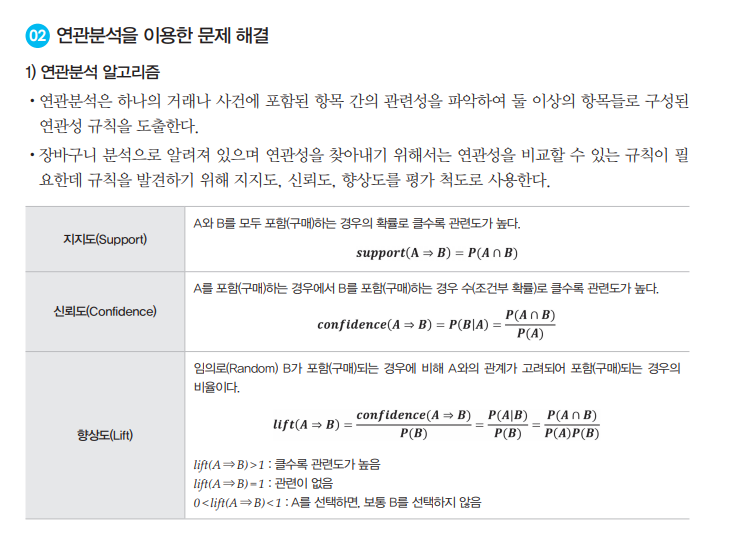

In [4]:
# 연관분석 알고리즘 이용하기
# 지지도, 신뢰도, 향상도 알아두기
from IPython.display import Image
Image(filename='C:/Engineer_Big_Data_Analysis/자료/association_support_confiidence_lift.png')
# 장바구니 구매 물품 데이터셋 이용해서 연관관계 파악하고 성능 평하가기
    # 총 7가지 종류 물품 있음
# 관련성을 평가하기 위해 apriori 알고리즘을 이용하기

In [8]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
# 장바구니 데이터 불러오기
df = pd.read_csv('C:/Engineer_Big_Data_Analysis/DATAS/이기적데이터/retail_dataset.csv')
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [72]:
# 컬럼 이름을 각 상품으로 해서 있을 경우 1, 없음 경우 0으로 변환 (원핫인코딩)

# 모든 셀의 유니크한 값 확인
product_list = pd.unique(df.dropna().values.ravel())
print(product_list, len(product_list))

# 새 df 만들기
new_df = pd.DataFrame(columns=product_list)
display(new_df)

# df 한 행씩 돌면서 상품이 있는 경우 1, 없음 경우 0
for i in range(len(df)):
    base_list = product_list
    target_list = df.loc[i].values
    new_df.loc[i] = [1 if item in target_list else 0 for item in base_list]

new_df

['Bread' 'Wine' 'Eggs' 'Meat' 'Cheese' 'Pencil' 'Diaper' 'Milk' 'Bagel'] 9


,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper,Milk,Bagel


,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper,Milk,Bagel
0,1,1,1,1,1,1,1,0,0
1,1,1,0,1,1,1,1,1,0
2,0,1,1,1,1,0,0,1,0
3,0,1,1,1,1,0,0,1,0
4,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
310,1,0,1,0,1,0,0,0,0
311,0,0,0,1,0,1,0,1,0
312,1,1,1,1,1,1,1,0,0
313,0,0,0,1,1,0,0,0,0


In [83]:
# new_df 로 apriori 수행
freq_items = apriori(new_df,            # 분석에 사용할 df
                     min_support=0.2,   # 지지도 임계값 이상의 결과만 뽑기
                     use_colnames=True) # col name 이용하기
display(freq_items.iloc[7:10])
# 결과로 나 df를 association_rules에 넣기

,support,itemsets
7,0.501587,(Milk)
8,0.425397,(Bagel)
9,0.244444,"(Wine, Bread)"


In [84]:
rules = association_rules(freq_items,
                          metric='confidence',  # 사용할 지표 (sopport, confidence, lift) 높을 수록 연관성 높음
                          min_threshold=0.6) # 지표 임계치

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
2,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
6,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
7,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
8,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773,0.487091
9,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,0.518717
